In [2]:
'''
Date: 2022.08.22
Title: 
By: Kang Jin Seong
'''

'''## 데이터 준비 '''
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

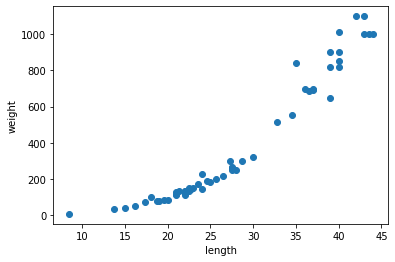

In [3]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length'); plt.ylabel('weight')
plt.show()

In [6]:
'''
Date: 2022.08.25
Title: 
By: Kang Jin Seong
'''

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

print(train_input.shape, type(train_input))

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42,) <class 'numpy.ndarray'>
(42, 1) (14, 1)


In [8]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target)) # 결정 계수 R^2 값

0.992809406101064


In [10]:
# 직관 적으로 알아보기 위해 타깃과 예측의 절대값 오차를 평균하여 반환해보자
from sklearn.metrics import mean_absolute_error
# 테스트 세트에서 예측 값을 만듭니다.
test_prediction = kn.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)
'''결과에서 예측이 평균적으로 19g 전도 타깃값과 다르다'''

19.157142857142862


'결과에서 예측이 평균적으로 19g 전도 타깃값과 다르다'

In [12]:
print(kn.score(train_input, train_target))
'''과소 적합이 이루어짐
과소 적합을 해결하기 위해서는 모델을 조금더 복잡하게 만들면된다'''

0.9698823289099254


'과소 적합이 이루어짐\n과소 적합을 해결하기 위해서는 모델을 조금더 복잡하게 만들면된다'

In [15]:
# 이웃의 개수를 3으로 설정합니다.
kn.n_neighbors = 3

kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


(40, 1)


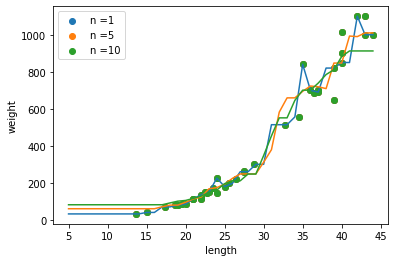

In [20]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
print(x.shape)

for n in [1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target,label='n =' + str(n))
  plt.xlabel('length');plt.ylabel('weight')
  plt.legend()
  plt.plot(x, prediction)

plt.show()